## Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution. 

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Academic performance” dataset of students
df = pd.read_excel('StudentsPerformance.xlsx')

In [3]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,NaN,2,NaN
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,NaN,78.0,1,NaN
4,male,NaN,78.0,75.0,81.0,3,Pune
5,female,71.0,NaN,78.0,70.0,4,NaN
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,NaN,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,NaN


In [4]:
# Scan all variables for missing values and inconsistencies
df.isnull()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,True
4,False,True,False,False,False,False,False
5,False,False,True,False,False,False,True
6,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True


In [5]:
df.isnull().sum()

gender                   0
math score               2
reading score            1
writing score            1
Placement Score          1
placement offer count    0
Region                   4
dtype: int64

In [6]:
# If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
df['math score'].fillna(df['math score'].mean(),inplace=True)
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)
df['Placement Score'].fillna(df['Placement Score'].mean(),inplace=True)

In [7]:
df['Region'].fillna(df['Region'].mode()[0],inplace=True)

In [8]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.00,74.0,78.000,1,Pune
1,female,69.000000,90.00,88.0,62.125,2,Pune
2,female,90.000000,95.00,93.0,74.000,2,Nashik
3,male,47.000000,57.00,77.0,78.000,1,Pune
4,male,52.285714,78.00,75.0,81.000,3,Pune
5,female,71.000000,72.25,78.0,70.000,4,Pune
6,male,12.000000,44.00,52.0,12.000,2,Nashik
7,male,52.285714,65.00,67.0,49.000,1,Pune
8,male,5.000000,77.00,89.0,55.000,0,Pune


<Axes: xlabel='math score'>

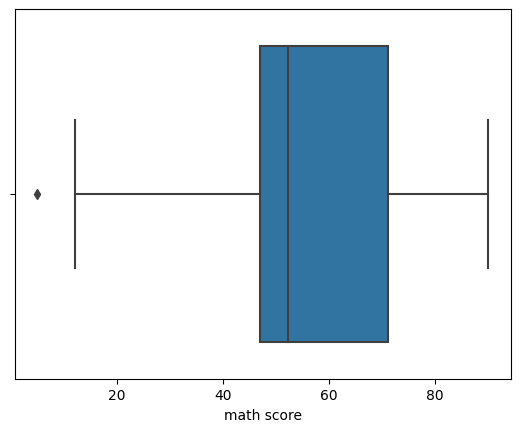

In [9]:
# Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
import seaborn as sns
sns.boxplot(x = df['math score'])

In [10]:
df['math score'] < 10

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
Name: math score, dtype: bool

In [11]:
df.drop(8,inplace = True)

<Axes: xlabel='reading score'>

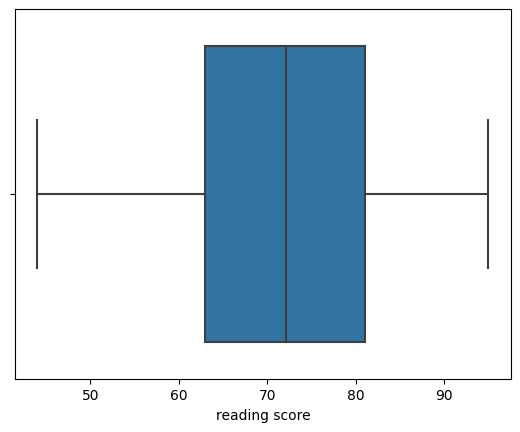

In [12]:
sns.boxplot(x = df['reading score'])

<Axes: xlabel='writing score'>

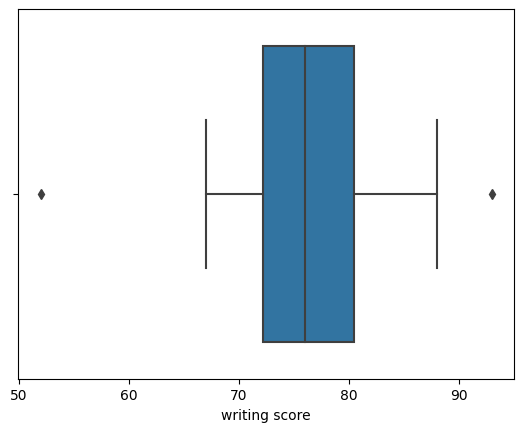

In [13]:
sns.boxplot(x = df['writing score'])

In [14]:
filtered_df = df[(df['writing score'] < 60) | (df['reading score'] > 90)]
filtered_df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
2,female,90.0,95.0,93.0,74.0,2,Nashik
6,male,12.0,44.0,52.0,12.0,2,Nashik


In [15]:
df.drop(2,inplace=True)

In [16]:
df.drop(6,inplace=True)

In [17]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.00,74.0,78.000,1,Pune
1,female,69.000000,90.00,88.0,62.125,2,Pune
3,male,47.000000,57.00,77.0,78.000,1,Pune
4,male,52.285714,78.00,75.0,81.000,3,Pune
5,female,71.000000,72.25,78.0,70.000,4,Pune
7,male,52.285714,65.00,67.0,49.000,1,Pune


<Axes: xlabel='Placement Score'>

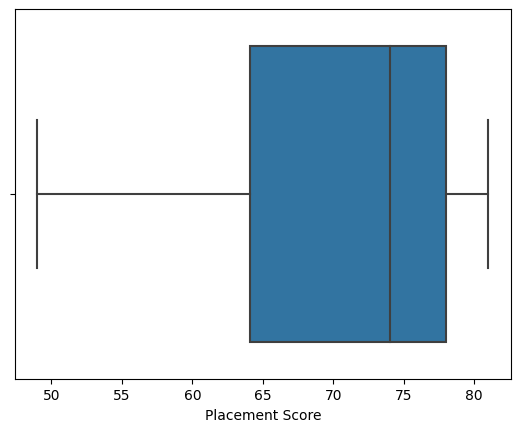

In [19]:
sns.boxplot(x = df['Placement Score'])

<Axes: xlabel='placement offer count'>

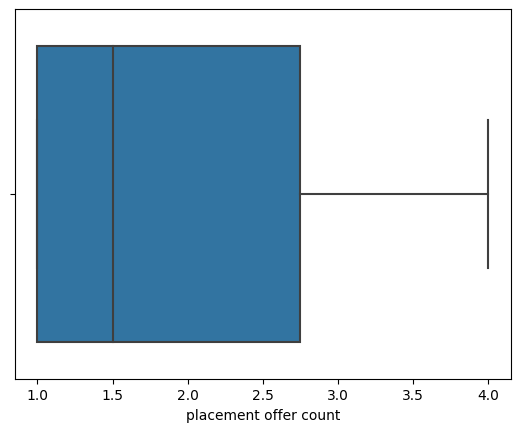

In [20]:
sns.boxplot(x = df['placement offer count'])

In [21]:
# Apply data transformations on at least one of the variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [22]:
# before scaling
df['math score']

0    72.000000
1    69.000000
3    47.000000
4    52.285714
5    71.000000
7    52.285714
Name: math score, dtype: float64

In [25]:
# Apply logarithmic transformation on the 'original_variable'
df['math score'] = np.log(df['math score'])
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,1.453174,72.00,74.0,78.000,1,Pune
1,female,1.443172,90.00,88.0,62.125,2,Pune
3,male,1.348111,57.00,77.0,78.000,1,Pune
4,male,1.375416,78.00,75.0,81.000,3,Pune
5,female,1.449898,72.25,78.0,70.000,4,Pune
7,male,1.375416,65.00,67.0,49.000,1,Pune


In [29]:
# Apply square root transformation on the 'original_variable'
df['reading score'] = np.sqrt(df['reading score'])

In [30]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,1.453174,8.485281,74.0,78.000,1,Pune
1,female,1.443172,9.486833,88.0,62.125,2,Pune
3,male,1.348111,7.549834,77.0,78.000,1,Pune
4,male,1.375416,8.831761,75.0,81.000,3,Pune
5,female,1.449898,8.500000,78.0,70.000,4,Pune
7,male,1.375416,8.062258,67.0,49.000,1,Pune
